In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaushil268/disease-prediction-using-machine-learning")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\kaushil268\disease-prediction-using-machine-learning\versions\1


In [6]:
import os
folder =r'C:\Users\user\.cache\kagglehub\datasets\kaushil268\disease-prediction-using-machine-learning\versions\1'
print(os.listdir(folder))

['Testing.csv', 'Training.csv']


In [7]:
train_df =pd.read_csv(r'C:\Users\user\.cache\kagglehub\datasets\kaushil268\disease-prediction-using-machine-learning\versions\1\Training.csv')

test_df = pd.read_csv(r'C:\Users\user\.cache\kagglehub\datasets\kaushil268\disease-prediction-using-machine-learning\versions\1\Testing.csv')

In [8]:
train_df = train_df.drop('Unnamed: 133', axis=1)
print(train_df.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [9]:
x =train_df.drop('prognosis', axis=1)
y = train_df['prognosis']

In [10]:
print(x.shape)
print(y.shape)

(4920, 132)
(4920,)


In [11]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
for i, class_name in enumerate(le.classes_):
    print(f"'{class_name}->{i}")

'(vertigo) Paroymsal  Positional Vertigo->0
'AIDS->1
'Acne->2
'Alcoholic hepatitis->3
'Allergy->4
'Arthritis->5
'Bronchial Asthma->6
'Cervical spondylosis->7
'Chicken pox->8
'Chronic cholestasis->9
'Common Cold->10
'Dengue->11
'Diabetes ->12
'Dimorphic hemmorhoids(piles)->13
'Drug Reaction->14
'Fungal infection->15
'GERD->16
'Gastroenteritis->17
'Heart attack->18
'Hepatitis B->19
'Hepatitis C->20
'Hepatitis D->21
'Hepatitis E->22
'Hypertension ->23
'Hyperthyroidism->24
'Hypoglycemia->25
'Hypothyroidism->26
'Impetigo->27
'Jaundice->28
'Malaria->29
'Migraine->30
'Osteoarthristis->31
'Paralysis (brain hemorrhage)->32
'Peptic ulcer diseae->33
'Pneumonia->34
'Psoriasis->35
'Tuberculosis->36
'Typhoid->37
'Urinary tract infection->38
'Varicose veins->39
'hepatitis A->40


In [12]:
import pickle
with open('label_encoder.pkl','wb') as f:
    pickle.dump(le, f)

In [13]:
# Use X and the encoded target y_encoded
X_train, X_val, y_train, y_val = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)


Shape of X_train: (3936, 132)
Shape of X_val: (984, 132)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [15]:
models = {
    "Logistic Regression":
LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Neighbours": KNeighborsClassifier(),
    "SVM": SVC()
}

In [16]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f"{name}: {acc:.4f}")

Logistic Regression: 1.0000
Decision Tree: 1.0000
Random Forest: 1.0000
Naive Bayes: 1.0000


C:\Users\user\PycharmProjects\PythonProject1\.venv\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)


K-Neighbours: 1.0000
SVM: 1.0000


In [17]:
# --- DEBUGGING CELL ---

# 1. Check if the 'prognosis' column is in X_train by mistake
if 'prognosis' in X_train.columns:
    print("🚨 PROBLEM FOUND: 'prognosis' is still in X_train!")
else:
    print("✅ GOOD: 'prognosis' is NOT in X_train.")


# 2. Let's check the shapes to make sure they match up
print("\n--- Data Shapes ---")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape:  {X_val.shape}")
print(f"y_val shape:  {y_val.shape}")

# 3. Display the first few columns of X_train to see what's in there
print("\nFirst 5 columns of X_train:")
print(list(X_train.columns[:5]))

✅ GOOD: 'prognosis' is NOT in X_train.

--- Data Shapes ---
X_train shape: (3936, 132)
y_train shape: (3936,)
X_val shape:  (984, 132)
y_val shape:  (984,)

First 5 columns of X_train:
['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering']


In [18]:
x_test = test_df.drop('prognosis', axis=1)
y_test_text = test_df['prognosis']
y_test =le.transform(y_test_text)

In [19]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f"{name}: {acc:.4f}")

Logistic Regression: 1.0000
Decision Tree: 1.0000
Random Forest: 1.0000
Naive Bayes: 1.0000


C:\Users\user\PycharmProjects\PythonProject1\.venv\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)


K-Neighbours: 1.0000
SVM: 1.0000


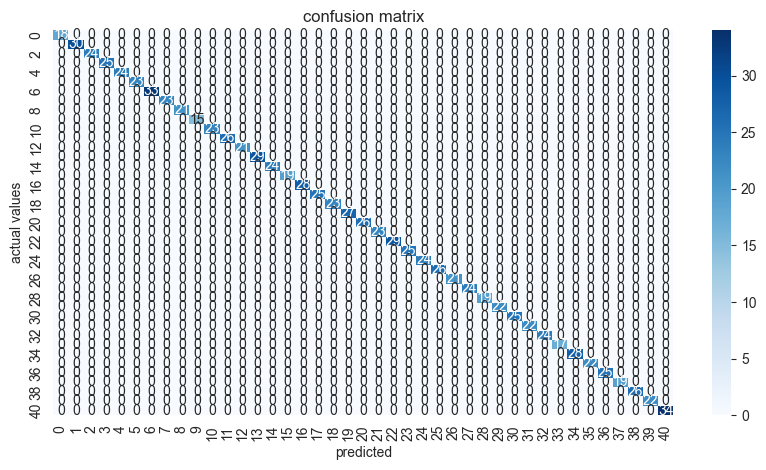

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_val)

cm = confusion_matrix(y_val,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual values')
plt.title('confusion matrix')
plt.show()

In [21]:

print(len(X_train))
print(len(X_val))
print(len(train_df))


3936
984
4920


In [22]:
train_idx = set(X_train.index)
val_idx = set(X_val.index)

overlap = train_idx.intersection(val_idx)
print(len(overlap))

0


In [23]:
test_df['prognosis'] = le.transform(test_df['prognosis'])

In [24]:
print(test_df.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [25]:
X_test = test_df.drop('prognosis', axis=1)
y_test = test_df['prognosis']

In [26]:
y_pred = model.predict(X_test)

Test Set Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
 

C:\Users\user\PycharmProjects\PythonProject1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\user\PycharmProjects\PythonProject1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\user\PycharmProjects\PythonProject1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\user\PycharmProjects\PythonProject1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_pred = type_of_target(y_pred, input

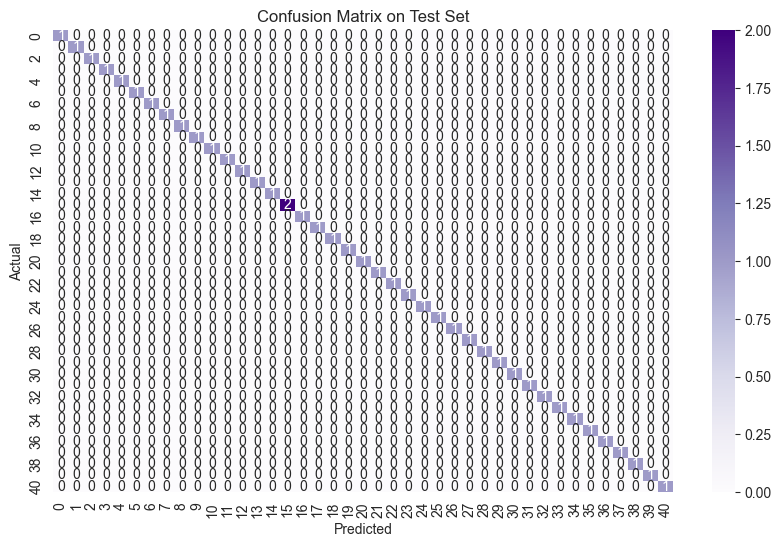

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {acc:.4f}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
symptoms = X_train.columns

In [29]:
user_input_symptom = ['sneezing', 'runny_nose','cough_congestion']

In [30]:
def prepare_input(symptoms_list, all_symptoms):
    input_data = np.zeros(len(all_symptoms))
    for i, symptom in enumerate(all_symptoms):
        if symptom in symptoms_list:
            input_data[i] = 1
    return  pd.DataFrame([input_data], columns=all_symptoms)

input_df = prepare_input(user_input_symptom,symptoms)

In [31]:
predicted_label_encoded = model.predict(input_df)[0]
predicted_disease = le.inverse_transform([predicted_label_encoded])[0]
print("Predicted Disease:", predicted_disease)

Predicted Disease: AIDS


In [32]:
print("symptom vector sum", input_df.sum(axis=1).values[0])
print("columns to set 1", input_df.columns[input_df.iloc[0] == 1].tolist())

symptom vector sum 1.0
columns to set 1 ['runny_nose']


In [33]:
pred_encoded = model.predict(input_df)[0]
print("Predicted class (encoded):", pred_encoded)
print("Predicted disease:", le.inverse_transform([pred_encoded])[0])

Predicted class (encoded): 1
Predicted disease: AIDS


In [34]:
print("traning samples per class")
print(train_df['prognosis'].value_counts())

traning samples per class
prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B             

In [35]:
print("training classes")
print(train_df['prognosis'].value_counts())

training classes
prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                      

In [36]:
print("test class ")
print(test_df['prognosis'].value_counts())

test class 
prognosis
15    2
20    1
22    1
3     1
36    1
10    1
34    1
13    1
18    1
39    1
26    1
24    1
25    1
31    1
5     1
0     1
2     1
38    1
35    1
21    1
19    1
4     1
40    1
16    1
9     1
14    1
33    1
1     1
12    1
17    1
6     1
23    1
30    1
7     1
32    1
28    1
29    1
8     1
11    1
37    1
27    1
Name: count, dtype: int64


In [37]:
import pandas as pd

# Paths to your datasets
train_path = r'C:\Users\user\.cache\KaggleHub\datasets\kaushil268\disease-prediction-using-machine-learning\versions\1\Training.csv'
test_path = r'C:\Users\user\.cache\KaggleHub\datasets\kaushil268\disease-prediction-using-machine-learning\versions\1\Testing.csv'

# Load both datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Combine them into one big DataFrame
full_df = pd.concat([train_df, test_df], ignore_index=True)

# Now, we do our cleaning on this combined DataFrame
full_df = full_df.drop('Unnamed: 133', axis=1)

# Check the final shape
print(f"Shape of our full, combined dataset: {full_df.shape}")
print("Combined data loaded and cleaned successfully.")

Shape of our full, combined dataset: (4962, 133)
Combined data loaded and cleaned successfully.


In [38]:
# X (features) = all columns except 'prognosis'
X = full_df.drop('prognosis', axis=1)

# y (target) = just the 'prognosis' column
y = full_df['prognosis']

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

Shape of X (features): (4962, 132)
Shape of y (target): (4962,)


In [39]:
import numpy as np

def add_noise(X, noise_level=0.15, seed=42):
    """
    Randomly flips a percentage of the symptom data (0s to 1s, 1s to 0s)
    to simulate a more realistic, "noisy" dataset.
    """
    np.random.seed(seed)
    X_noisy = X.copy()

    # Calculate the total number of cells to flip
    # Based on your old notebook: 15% of the number of rows
    # A more robust way is to use noise_level * total_cells
    num_cells_to_flip = int(noise_level * X.shape[0] * X.shape[1])

    # Randomly select row and column indices to flip
    rows = np.random.randint(0, X.shape[0], size=num_cells_to_flip)
    cols = np.random.randint(0, X.shape[1], size=num_cells_to_flip)

    # Flip the selected values (0 becomes 1, 1 becomes 0)
    # Using .iat for fast single-cell access
    for r, c in zip(rows, cols):
        X_noisy.iat[r, c] = 1 - X_noisy.iat[r, c]

    print(f"Added noise: Flipped {num_cells_to_flip} data points.")
    return X_noisy

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib

# --- 1. Apply the noise function to our master X data ---
print("Applying noise to the dataset...")
# Using 0.01 (1% noise) as a starting point. Your old notebook used 0.15,
# but let's start lower to see the effect. You can change this value!
X_noisy = add_noise(X, noise_level=0.01, seed=42)

# --- 2. Encode the master y target variable ---
print("Encoding the target variable (y)...")
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Save the encoder NOW so we don't forget.
# This is critical for our app later.
encoder_path = r'C:\Users\user\PycharmProjects\PythonProject1\Medical-DiagnosticPRJ\notebooks\medical_Diagnostic_prediction_APP\label_encoder.pkl'
joblib.dump(le, encoder_path)
print(f"Label encoder saved to {encoder_path}")

# --- 3. Split the new NOISY data for training and testing ---
# We'll use a 70/30 split. test_size=0.3 means 30% for testing.
# stratify=y_encoded ensures both train and test sets have a
# fair mix of all diseases.
X_train, X_test, y_train, y_test = train_test_split(
    X_noisy, y_encoded,
    test_size=0.3,
    random_state=42,
    stratify=y_encoded
)

print("\nData splitting complete:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Applying noise to the dataset...
Added noise: Flipped 6549 data points.
Encoding the target variable (y)...
Label encoder saved to C:\Users\user\PycharmProjects\PythonProject1\Medical-DiagnosticPRJ\notebooks\medical_Diagnostic_prediction_APP\label_encoder.pkl

Data splitting complete:
X_train shape: (3473, 132)
X_test shape: (1489, 132)
y_train shape: (3473,)
y_test shape: (1489,)


In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib

# --- 1. Apply the noise function to our master X data ---
print("Applying noise to the dataset...")
# We're using the 1% noise level, you can change this later
X_noisy = add_noise(X, noise_level=0.15, seed=42)

# --- 2. Encode the master y target variable ---
print("Encoding the target variable (y)...")
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Save the encoder NOW so we don't forget.
# This is critical for our app later.
# Make sure you have a folder named 'medical_diagnostic_prediction_APP'
import os
os.makedirs('medical_diagnostic_prediction_APP', exist_ok=True)
encoder_path = 'medical_diagnostic_prediction_APP/label_encoder.pkl'
joblib.dump(le, encoder_path)
print(f"Label encoder saved to {encoder_path}")

# --- 3. Split the new NOISY data for training and validation ---
# This is the line we are fixing. All the data is now
# INSIDE the parentheses ()
print("\nSplitting data into train and validation sets...")
X_train, X_val, y_train, y_val = train_test_split(
    X_noisy, y_encoded,
    test_size=0.3,
    random_state=42,
    stratify=y_encoded
)

print("\nData splitting complete:")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

Applying noise to the dataset...
Added noise: Flipped 98247 data points.
Encoding the target variable (y)...
Label encoder saved to medical_diagnostic_prediction_APP/label_encoder.pkl

Splitting data into train and validation sets...

Data splitting complete:
X_train shape: (3473, 132)
X_val shape: (1489, 132)
y_train shape: (3473,)
y_val shape: (1489,)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Define all the models you want to try
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Neighbours': KNeighborsClassifier(),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42) # probability=True is key!
}

# 2. Loop, train, and evaluate
print("--- Training and Evaluating Models ---")
model_accuracies = {} # To store the scores

for name, model in models.items():
    # Train the model on the training data
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred = model.predict(X_val)

    # Calculate and print the accuracy
    acc = accuracy_score(y_val, y_pred)
    model_accuracies[name] = acc
    print(f"✅ {name} Accuracy: {acc:.4f}\n")

print("\n--- All Models Trained ---")
print(model_accuracies)

--- Training and Evaluating Models ---
Training Logistic Regression...
✅ Logistic Regression Accuracy: 0.8959

Training Decision Tree...
✅ Decision Tree Accuracy: 0.4748

Training Random Forest...
✅ Random Forest Accuracy: 0.8731

Training Naive Bayes...
✅ Naive Bayes Accuracy: 0.7676

Training K-Neighbours...


C:\Users\user\PycharmProjects\PythonProject1\.venv\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)


✅ K-Neighbours Accuracy: 0.7750

Training SVM...
✅ SVM Accuracy: 0.9187


--- All Models Trained ---
{'Logistic Regression': 0.8959032907991941, 'Decision Tree': 0.4748153122901276, 'Random Forest': 0.8730691739422431, 'Naive Bayes': 0.7676292813969107, 'K-Neighbours': 0.7750167897918065, 'SVM': 0.9187374076561451}


In [43]:
import joblib

# 1. Get our best-performing model (SVM) from the dictionary
best_model = models['SVM']

# 2. Define the path and save the model
model_path = 'medical_diagnostic_prediction_APP/svm_model.pkl'
joblib.dump(best_model, model_path)

print(f"Best model (SVM) saved successfully to: {model_path}")

# 3. We also MUST save the list of symptom columns
# Our app needs this to create the input vector
symptom_columns = list(X.columns)
columns_path = 'medical_diagnostic_prediction_APP/symptom_columns.pkl'
joblib.dump(symptom_columns, columns_path)

print(f"Symptom columns saved successfully to: {columns_path}")

Best model (SVM) saved successfully to: medical_diagnostic_prediction_APP/svm_model.pkl
Symptom columns saved successfully to: medical_diagnostic_prediction_APP/symptom_columns.pkl


In [44]:
import joblib
import numpy as np
import pandas as pd

# --- 1. Load All Our Saved Files ---
# (Even though they are in memory, we load from the files
# to prove that the files were saved correctly)

model = joblib.load('medical_diagnostic_prediction_APP/svm_model.pkl')
le = joblib.load('medical_diagnostic_prediction_APP/label_encoder.pkl')
symptom_columns = joblib.load('medical_diagnostic_prediction_APP/symptom_columns.pkl')

print("--- All files loaded successfully ---")


# --- 2. Define Your Test Symptoms ---
# You can change this list to anything you want!
# Let's try symptoms for 'Jaundice'
user_input_symptoms = [
  'stomach_pain', 'acidity', 'ulcers_on_tongue'
]

print(f"\nTesting with symptoms: {user_input_symptoms}")

# --- 3. Convert Symptoms to Model Input Vector ---
# This is the logic your app will use

# Create a zero vector with the same shape as the model's training data
input_vector = np.zeros(len(symptom_columns))

# Loop through the user's symptoms
for symptom in user_input_symptoms:
    if symptom in symptom_columns:
        # Find the index of this symptom
        idx = symptom_columns.index(symptom)
        # Set the value at that index to 1
        input_vector[idx] = 1
    else:
        print(f"Warning: Symptom '{symptom}' not in database. Skipping.")

# Reshape the vector to be (1, n_features) as the model expects
#input_vector = input_vector.reshape(1, -1)
input_df = pd.DataFrame([input_vector],columns=symptom_columns)

# --- 4. Make Predictions & Show Top 3 ---

# Get the probabilities for all classes
#probabilities = model.predict_proba(input_vector)[0]
probabilities = model.predict_proba(input_df)[0]

# Get the indices of the top 3 probabilities
top_3_indices = np.argsort(probabilities)[-3:][::-1] # [::-1] to get descending order

print("\n--- Top 3 Predictions ---")
predictions_made = False
for i in top_3_indices:
    confidence = probabilities[i]
    disease_name = le.inverse_transform([i])[0]

    # Let's set a 5% threshold to show a prediction
    if confidence > 0.05:
        print(f"Prediction: {disease_name}")
        print(f"Confidence: {confidence * 100:.2f}%")
        print("-" * 20)
        predictions_made = True

if not predictions_made:
    print("Model is not confident enough to make a prediction.")

--- All files loaded successfully ---

Testing with symptoms: ['stomach_pain', 'acidity', 'ulcers_on_tongue']

--- Top 3 Predictions ---
Prediction: GERD
Confidence: 90.14%
--------------------


In [45]:
print(symptom_columns)

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow